# TUGAS 1 : Menghitung Jarak


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import library yang diperlukan
import pandas as pd
import math 
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# membaca data csv
anime = pd.read_csv("https://raw.githubusercontent.com/callmezamm/datamining/main/TopAnimatedImDb.csv")
print(anime)

                                Title  Rating      Votes     Gross  \
0       Sen to Chihiro no kamikakushi     8.6    747,148   $10.06M   
1                       The Lion King     8.5  1,041,158  $422.78M   
2                      Hotaru no haka     8.5    272,469       NaN   
3                      Kimi no na wa.     8.4    259,975    $5.02M   
4   Spider-Man: Into the Spider-Verse     8.4    510,227  $190.24M   
..                                ...     ...        ...       ...   
80                      Kung Fu Panda     7.6    463,897  $215.43M   
81                              Mulan     7.6    284,542  $120.62M   
82                 The Little Mermaid     7.6    260,026  $111.54M   
83                    The Jungle Book     7.6    181,528  $141.84M   
84    Snow White and the Seven Dwarfs     7.6    197,860  $184.93M   

                 Genre  Metascore Certificate             Director  Year  \
0    Adventure, Family       96.0           U       Hayao Miyazaki  2001   
1     A

In [ ]:
anime.head()

,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime
0,Sen to Chihiro no kamikakushi,8.6,"747,148",$10.06M,"Adventure, Family",96.0,U,Hayao Miyazaki,2001,"[""\nDuring her family's move to the suburbs, a...",125 min
1,The Lion King,8.5,"1,041,158",$422.78M,"Adventure, Drama",88.0,U,Roger Allers,1994,['\nLion prince Simba and his father are targe...,88 min
2,Hotaru no haka,8.5,"272,469",NaN,"Drama, War",94.0,U,Isao Takahata,1988,['\nA young boy and his little sister struggle...,89 min
3,Kimi no na wa.,8.4,"259,975",$5.02M,"Drama, Fantasy",79.0,U,Makoto Shinkai,2016,['\nTwo strangers find themselves linked in a ...,106 min
4,Spider-Man: Into the Spider-Verse,8.4,"510,227",$190.24M,"Action, Adventure",87.0,U,Bob Persichetti,2018,['\nTeen Miles Morales becomes the Spider-Man ...,117 min


NOMINAL

In [ ]:
def nom_anime(a,b):
  p = 7
  q = 0
  for col in ["Title", "Genre", "Certificate", "Director", "Description","Year", "Runtime"]:
    if anime[col][a]==anime[col][b]:
      q += 1
  return (p-q)/p

In [ ]:
print(nom_anime(1,2))
print(nom_anime(1,3))
print(nom_anime(1,4))

0.8571428571428571
0.8571428571428571
0.8571428571428571


NUMERIK

In [ ]:
#menampilkan data numerik
anime[["Rating", "Metascore"]].head()

,Rating,Metascore
0,8.6,96.0
1,8.5,88.0
2,8.5,94.0
3,8.4,79.0
4,8.4,87.0


In [ ]:
anime.describe()

,Rating,Metascore,Year
count,85.000000,80.000000,85.000000
mean,7.922353,80.850000,2003.211765
std,0.257449,8.965616,15.255830
min,7.600000,59.000000,1937.000000
25%,7.700000,74.000000,1995.000000
50%,7.900000,82.000000,2007.000000
75%,8.100000,87.000000,2014.000000
max,8.600000,96.000000,2021.000000


In [ ]:
#normalisasi rating
std_rat = 0.257449
mean_rat = 7.922353
for col1 in ["Rating"]:
    anime1 = anime[col1]
    hasil1 = (anime1-mean_rat)/std_rat
    print(hasil1)

#normalisasi metascore
std_met = 8.965616
mean_met = 80.850000
for col2 in ["Metascore"]:
    anime2 = anime[col2]
    hasil2 = (anime2-mean_met)/std_met
    print(hasil2)

0     2.632160
1     2.243734
2     2.243734
3     1.855307
4     1.855307
        ...   
80   -1.252104
81   -1.252104
82   -1.252104
83   -1.252104
84   -1.252104
Name: Rating, Length: 85, dtype: float64
0     1.689789
1     0.797491
2     1.466715
3    -0.206344
4     0.685954
        ...   
80   -0.764030
81   -1.098642
82    0.797491
83   -1.767865
84    1.578252
Name: Metascore, Length: 85, dtype: float64


In [ ]:
# Menghitung jarak data Numeric dengan cara Euclidean
def num_anime(a,b,c):
    result = 0
    for col in [hasil1, hasil2]:
        result = math.pow(abs(col[a] - col[b]), c)
    return result**(1/c)

In [ ]:
print(num_anime(1,2,2))
print(num_anime(1,3,2))
print(num_anime(1,4,2))

0.6692233974776524
1.0038350962164784
0.11153723291294204


SIMILARITY

In [ ]:
print("Jarak d(1,2) =", nom_anime(1,2)+num_anime(1,2,2))


Jarak d(1,2) = 1.5263662546205095


In [ ]:
print("Jarak d(1,3) =", nom_anime(1,3)+num_anime(1,3,3))

Jarak d(1,3) = 1.8609779533593356


In [ ]:
print("Jarak d(1,4) =", nom_anime(1,4)+num_anime(1,4,4))

Jarak d(1,4) = 0.9686800900557991


# TUGAS 2 : Diskritisasi 

## load file csv

In [ ]:
iris = pd.read_csv("https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv")
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
sepalLeght = iris.SepalLengthCm

In [ ]:
xx = sepalLeght.values.reshape(-1, 1)

In [ ]:
est = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')

In [ ]:
est.fit(xx)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [ ]:
KBinsDiscretizer(...)

KBinsDiscretizer(n_bins=Ellipsis)

In [ ]:
sLeght =est.transform(xx)

In [ ]:
df_sl = pd.DataFrame(sLeght, columns = ["Sepal Lenght"])

In [ ]:
df_sl

,Sepal Lenght
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [ ]:
sepalWidth = iris.SepalWidthCm

In [ ]:
sw = sepalWidth.values.reshape(-1, 1)

In [ ]:
est = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')

In [ ]:
est.fit(sw)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [ ]:
KBinsDiscretizer(...)

KBinsDiscretizer(n_bins=Ellipsis)

In [ ]:
sWidth =est.transform(sw)

In [ ]:
df_sw = pd.DataFrame(sWidth, columns = ["Sepal Width"])

In [ ]:
df_sw

,0
0,2.0
1,1.0
2,2.0
3,1.0
4,2.0
...,...
145,1.0
146,0.0
147,1.0
148,2.0


In [ ]:
petalLength = iris.PetalLengthCm

In [ ]:
pl = petalLength.values.reshape(-1, 1)

In [ ]:
est = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')

In [ ]:
est.fit(pl)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [ ]:
KBinsDiscretizer(...)

KBinsDiscretizer(n_bins=Ellipsis)

In [ ]:
pLenght =est.transform(pl)

In [ ]:
df_pl = pd.DataFrame(pLenght, columns = ["Petal Lenght"])

In [ ]:
df_pl

,Petal Lenght
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [ ]:
petalWidth = iris.PetalWidthCm

In [ ]:
pw = petalWidth.values.reshape(-1, 1)

In [ ]:
est = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')

In [ ]:
est.fit(pw)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [ ]:
KBinsDiscretizer(...)

KBinsDiscretizer(n_bins=Ellipsis)

In [ ]:
pWidth =est.transform(pw)

In [ ]:
df_pw = pd.DataFrame(pWidth, columns = ["Petal Width"]) 

In [ ]:
df_pw

,Petal Width
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,3.0
146,3.0
147,3.0
148,3.0


In [ ]:
df_list = [df_sl, df_sw, df_pl, df_pw, iris.Species]
df_full=pd.concat(df_list, axis=1)

In [ ]:
df_full

,Sepal Lenght,Sepal Width,Petal Lenght,Petal Width,Species
0,0.0,2.0,0.0,0.0,Iris-setosa
1,0.0,1.0,0.0,0.0,Iris-setosa
2,0.0,2.0,0.0,0.0,Iris-setosa
3,0.0,1.0,0.0,0.0,Iris-setosa
4,0.0,2.0,0.0,0.0,Iris-setosa
...,...,...,...,...,...
145,2.0,1.0,2.0,3.0,Iris-virginica
146,2.0,0.0,2.0,3.0,Iris-virginica
147,2.0,1.0,2.0,3.0,Iris-virginica
148,2.0,2.0,2.0,3.0,Iris-virginica


In [ ]:
df_full.to_csv("irisdata.csv")

# TUGAS 3 : K-Nearest Neighbors

In [ ]:
# import library yang diperlukan
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
X = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn import metrics
k_range = range(1,26)
scores = {}
score_list = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred= knn.predict(X_test)
  scores[k]=metrics.accuracy_score(y_test, y_pred)
  score_list.append(metrics.accuracy_score(y_test, y_pred))


Text(0, 0.5, 'testing accuracy')

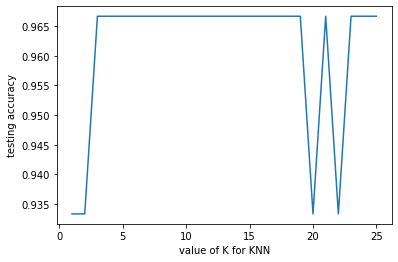

In [ ]:
%matplotlib inline

plt.plot(k_range, score_list)
plt.xlabel('value of K for KNN')
plt.ylabel('testing accuracy')

In [ ]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

new = [[3,2,4,4], [5,4,2,2]]
y_predict = knn.predict(new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

virginica
setosa
